# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully 

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/EasyVisa.csv')

Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.shape

(25480, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- 3 numerical columns: no_of_employees, yr_of_estab, prevailing_wage.
- All other columns are categorical.
- No missing values.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


- no_of_employees: Mean of 5,667 employees, but wide variation (std = 22,877), with some negative values.
- yr_of_estab: Most companies were established around 1979, with a minimum year of 1800 and maximum of 2016.
- prevailing_wage: Average wage is around $74,455, with a large spread (std = $52,815). The minimum wage is low ($2.14).

In [ ]:
df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
no_of_employees,7105
yr_of_estab,199
region_of_employment,5
prevailing_wage,25454
unit_of_wage,4


In [ ]:
data = df.copy()


In [ ]:
data.drop('case_id', axis=1, inplace=True)

- droped it because its a unique

In [ ]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


In [ ]:
data.describe(include=['category']).T

,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


## Exploratory Data Analysis (EDA)



**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### functions used

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="black"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="red",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="red",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# prompt: save the cat features in categorical_features and the num in numerical_features

numerical_features = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
categorical_features = ['continent', 'education_of_employee', 'has_job_experience',
                         'requires_job_training', 'region_of_employment',
                         'unit_of_wage', 'full_time_position', 'case_status']

- all the steps before to streamline the EDA


### Univariate Analysis

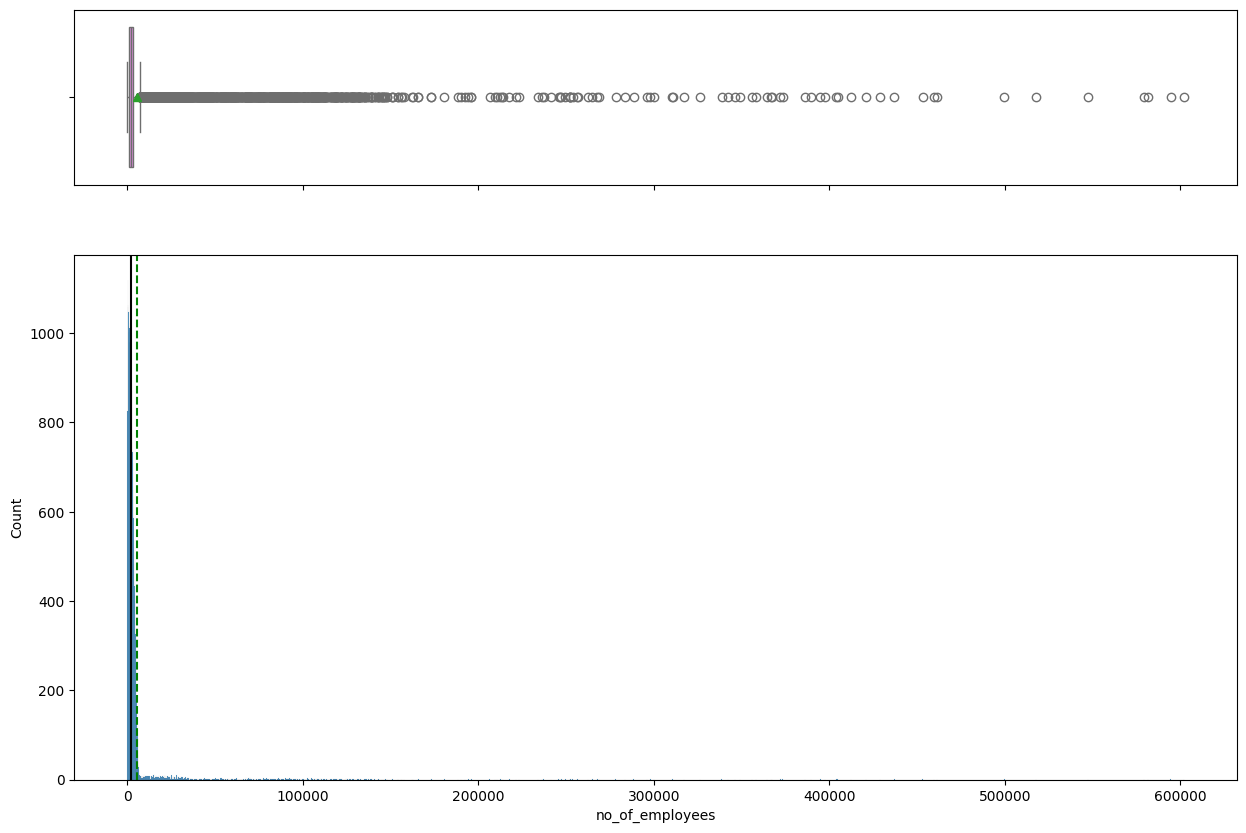

In [ ]:
histogram_boxplot(data, numerical_features[0])

- The no_of_employees feature is highly skewed with many outliers. Most companies have few employees, but some are extremely large.

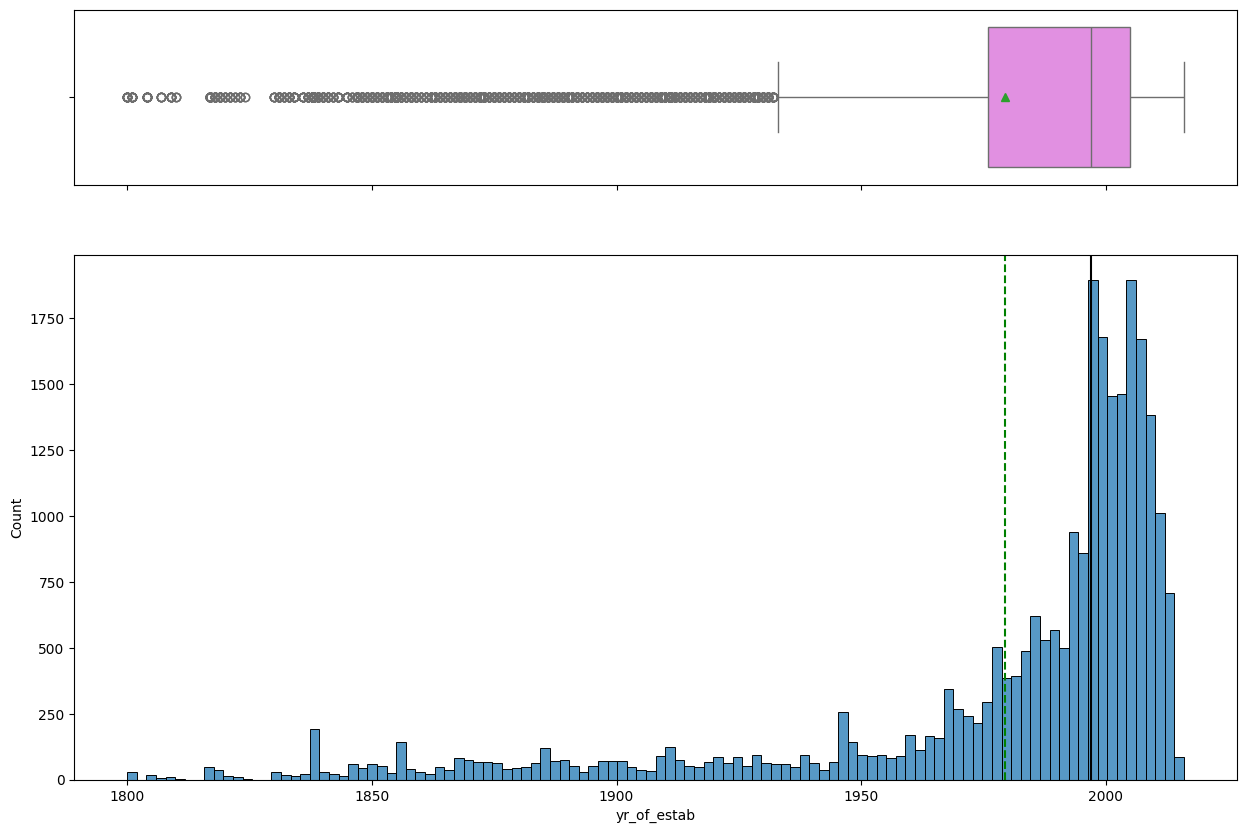

In [ ]:
histogram_boxplot(data, numerical_features[1])

- Most companies were established after 1950, with a sharp increase around the 2000s.
- There are outliers (some companies established in the 1800s) .
- The distribution is right-skewed, indicating that most companies are relatively new.

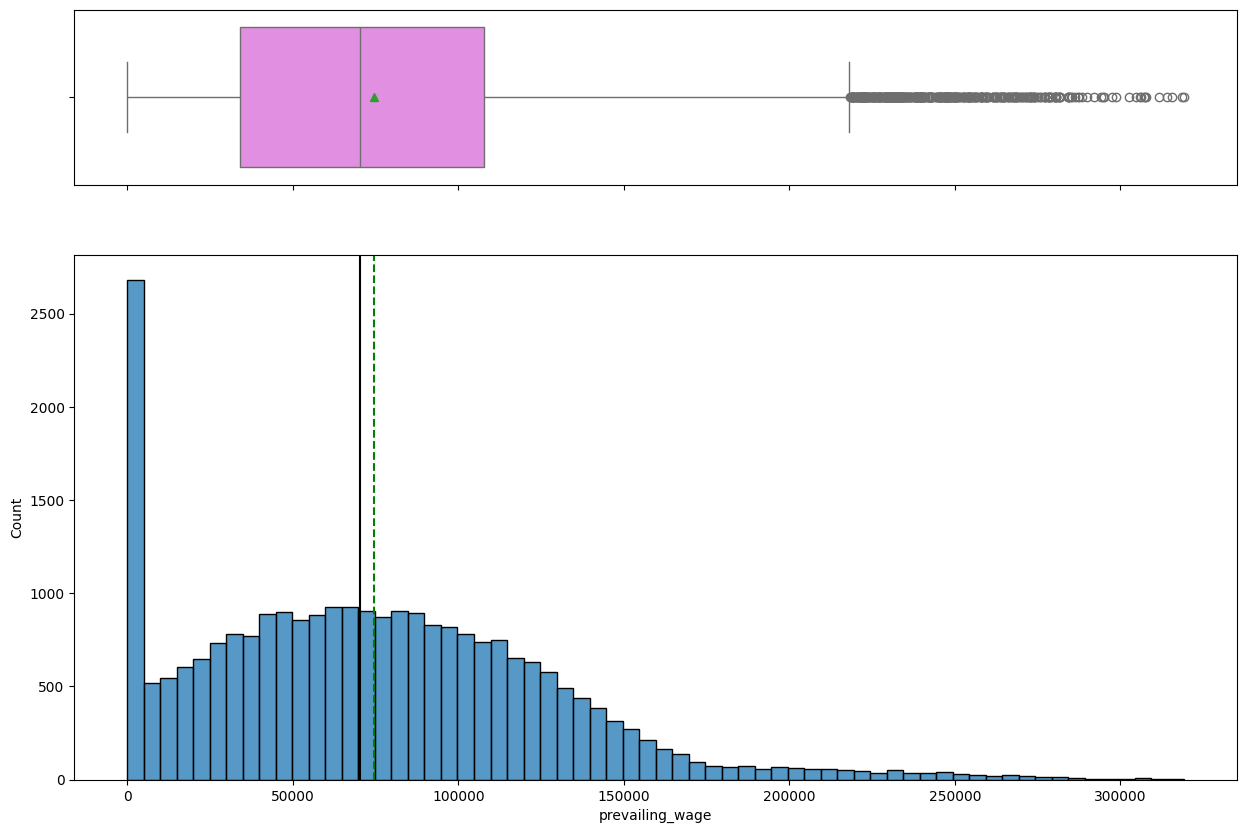

In [ ]:
histogram_boxplot(data, numerical_features[2])

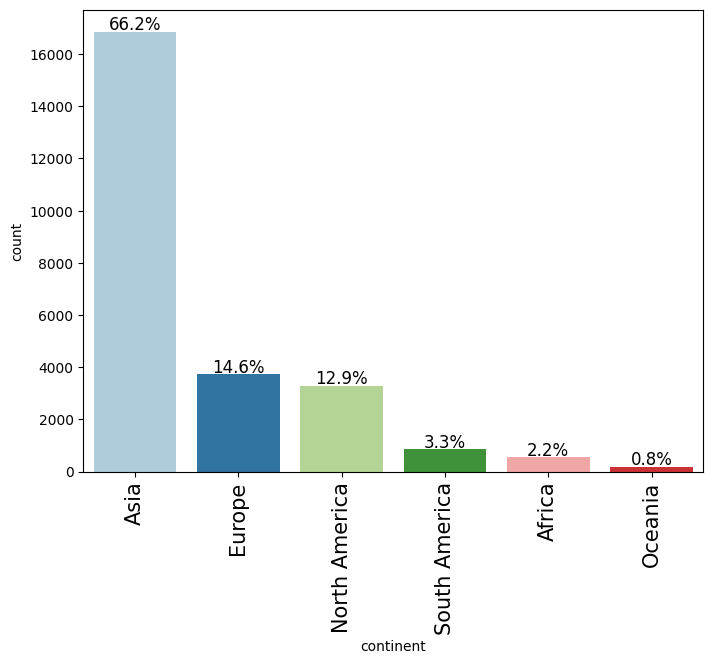

In [ ]:
labeled_barplot(data,categorical_features[0], perc=True)

- Asia is the highest

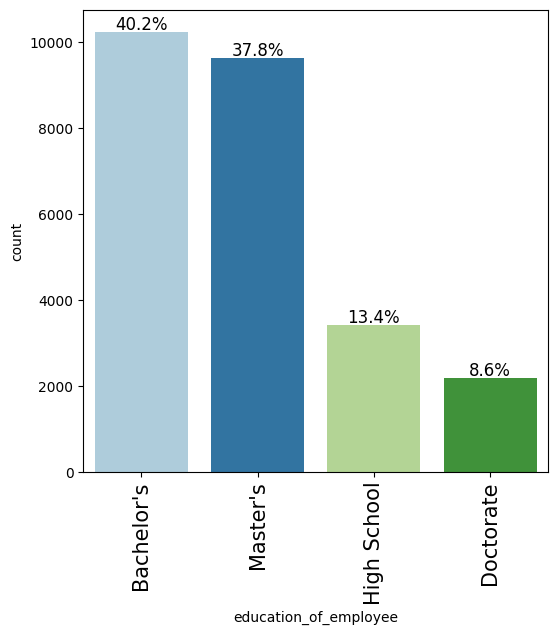

In [ ]:
labeled_barplot(data,categorical_features[1], perc=True)

- Bachelor's degree holders represent the largest group (40.2%), followed by Master's (37.8%). This suggests that most visa applicants have higher education, with fewer from High School (13.4%) and Doctorate (8.6%).

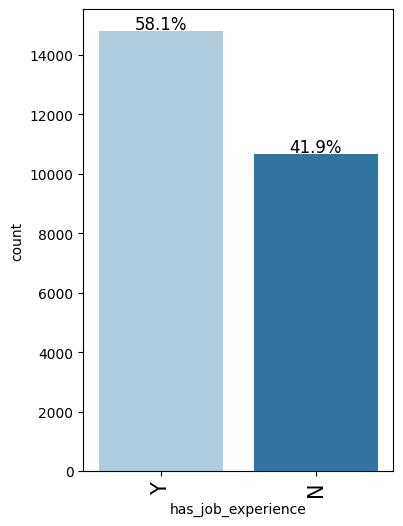

In [ ]:
labeled_barplot(data,categorical_features[2], perc=True)

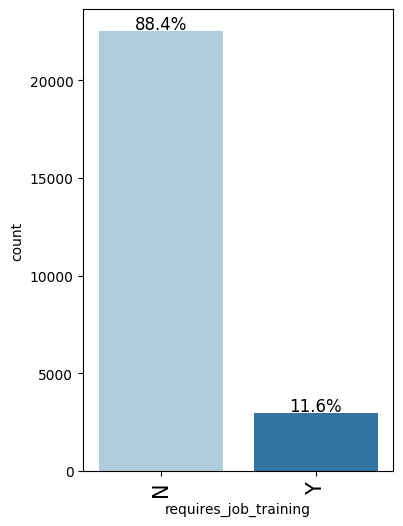

In [ ]:
labeled_barplot(data,categorical_features[3], perc=True)

- Most applicants do not require job training, with only a small portion indicating that training is necessary. This suggests that the majority of applicants are expected to have the necessary skills for their roles.

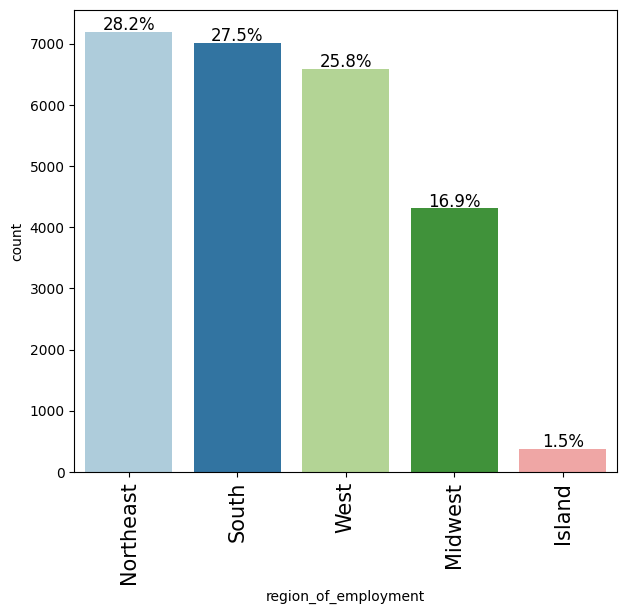

In [ ]:
labeled_barplot(data,categorical_features[4], perc=True)

- The majority of visa applicants are concentrated in the Northeast, South, and West regions, with fewer in the Midwest and very few in the Island regions. This suggests regional variation in demand for foreign labor.

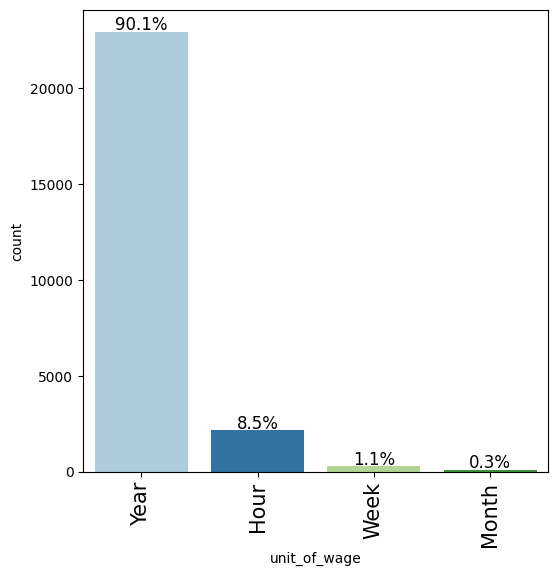

In [ ]:
labeled_barplot(data,categorical_features[5], perc=True)

- Most of them work with yearly wage

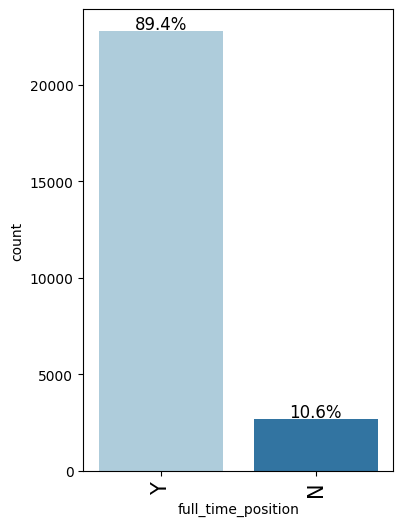

In [ ]:
labeled_barplot(data,categorical_features[6], perc=True)

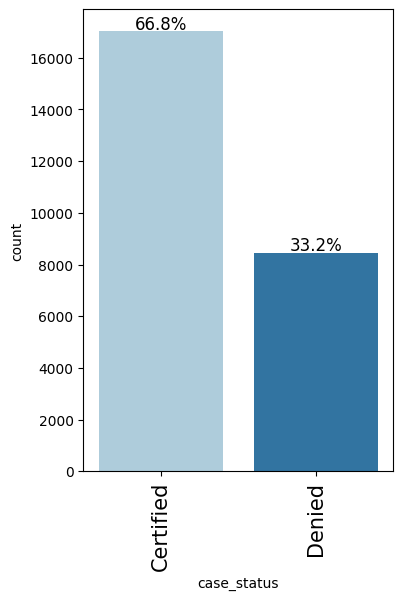

In [ ]:
labeled_barplot(data,categorical_features[7], perc=True)

###Bivariate Analysis

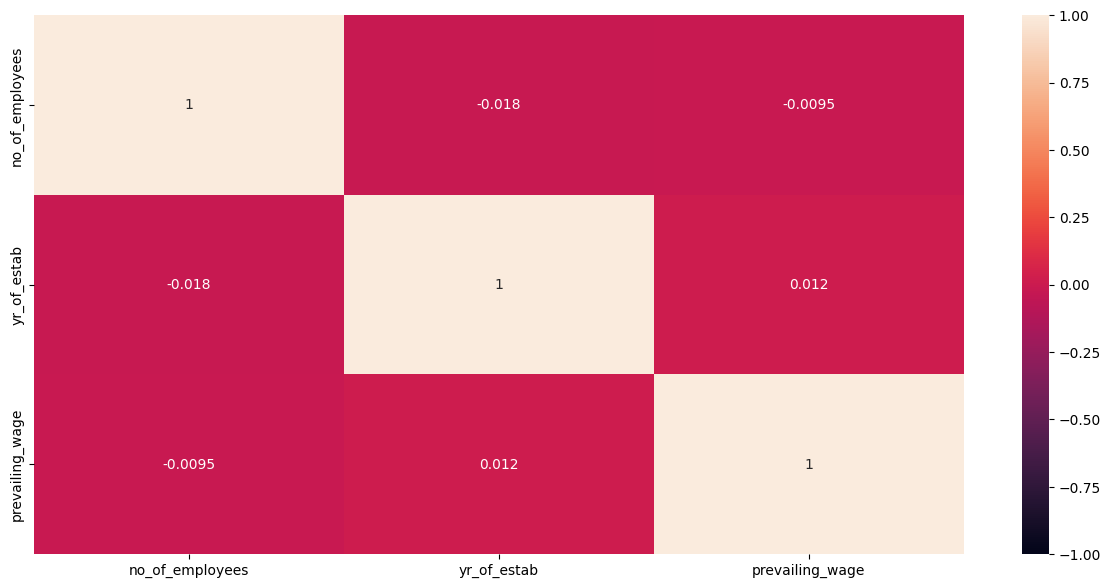

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data[numerical_features].corr(), annot=True, vmin=-1, vmax=1)
plt.show()

- It seems that there is no corr between them

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


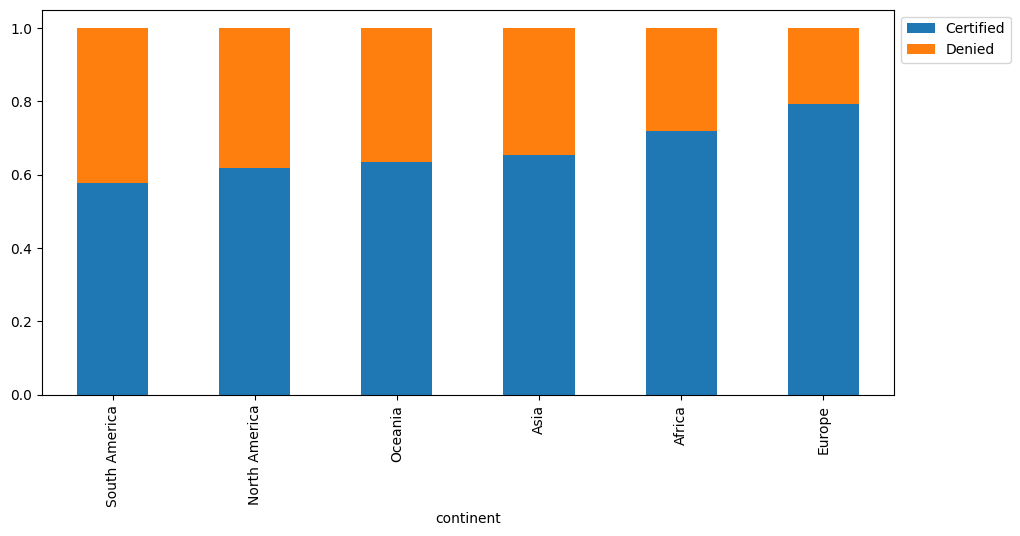

In [ ]:
stacked_barplot(data, predictor=categorical_features[0], target='case_status')

- Visa certification rates vary by continent. South America has the highest denial rate, while Europe and Africa have relatively higher certification rates compared to other regions. This suggests regional differences in visa outcomes.








case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


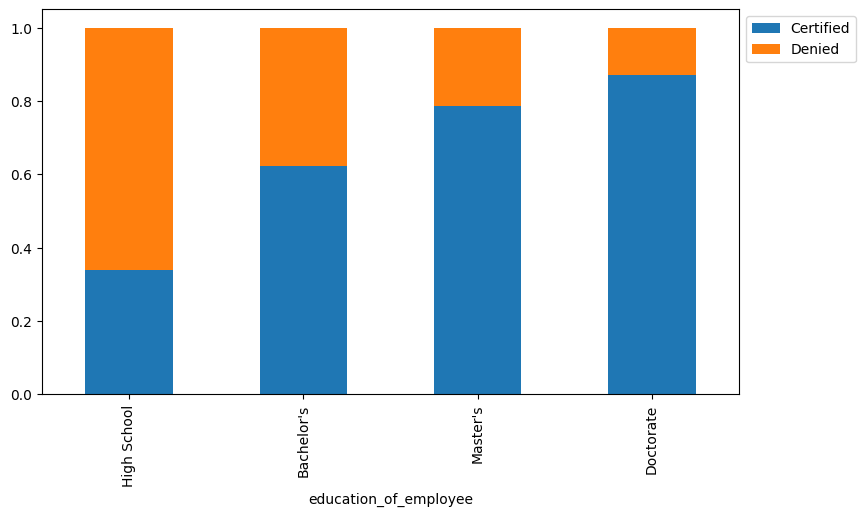

In [ ]:
stacked_barplot(data, predictor=categorical_features[1], target='case_status')

- Visa certification rates increase with higher education levels

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


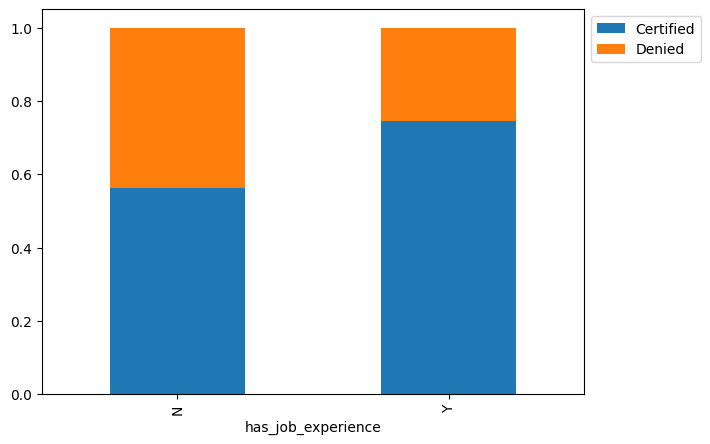

In [ ]:
stacked_barplot(data, predictor=categorical_features[2], target='case_status')

- Applicants with job experience have a higher visa certification rate compared to those without.

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


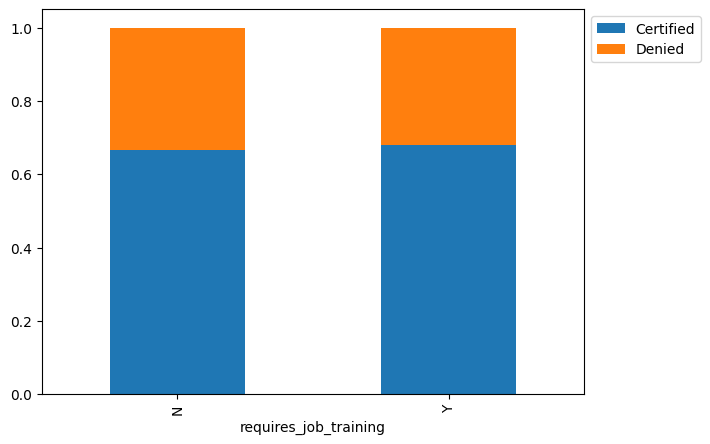

In [ ]:
stacked_barplot(data, predictor=categorical_features[3], target='case_status')

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


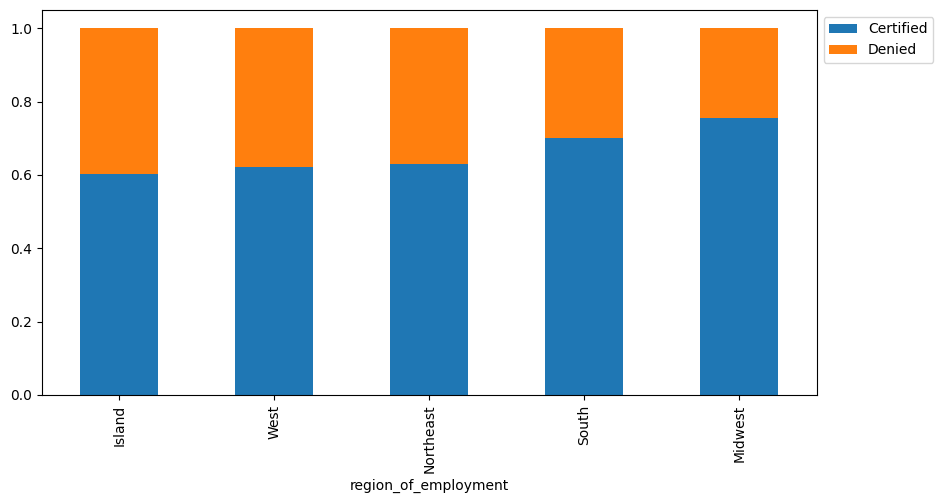

In [ ]:
stacked_barplot(data, predictor=categorical_features[4], target='case_status')

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


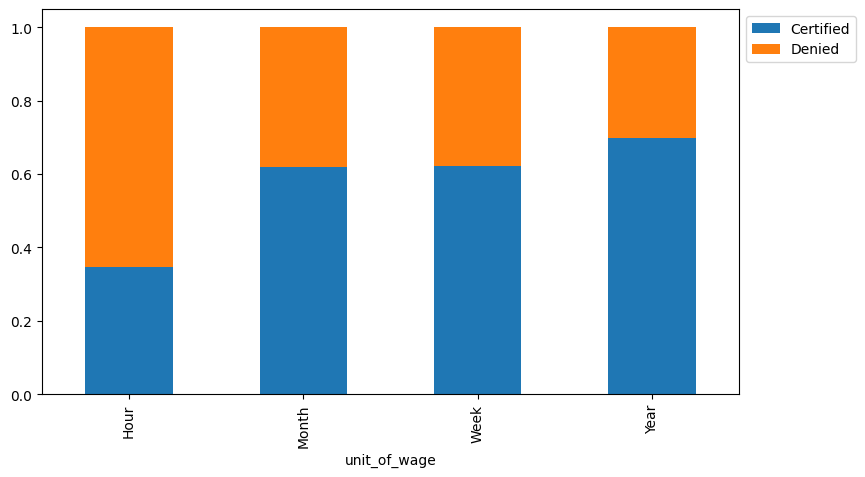

In [ ]:
stacked_barplot(data, predictor=categorical_features[5], target='case_status')

- Applicants paid by the hour face the highest denial rate

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


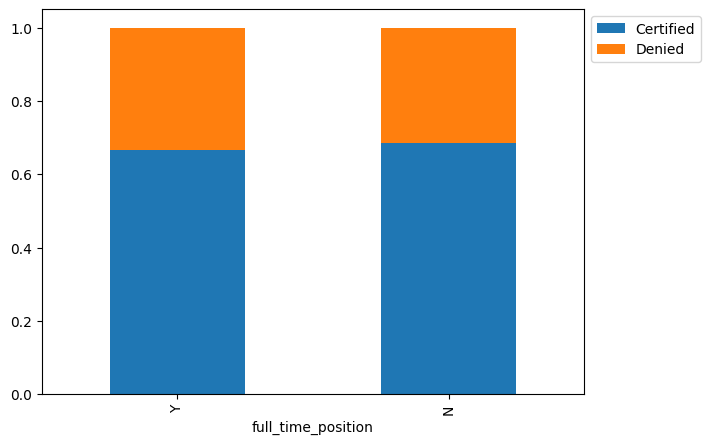

In [ ]:
stacked_barplot(data, predictor=categorical_features[6], target='case_status')

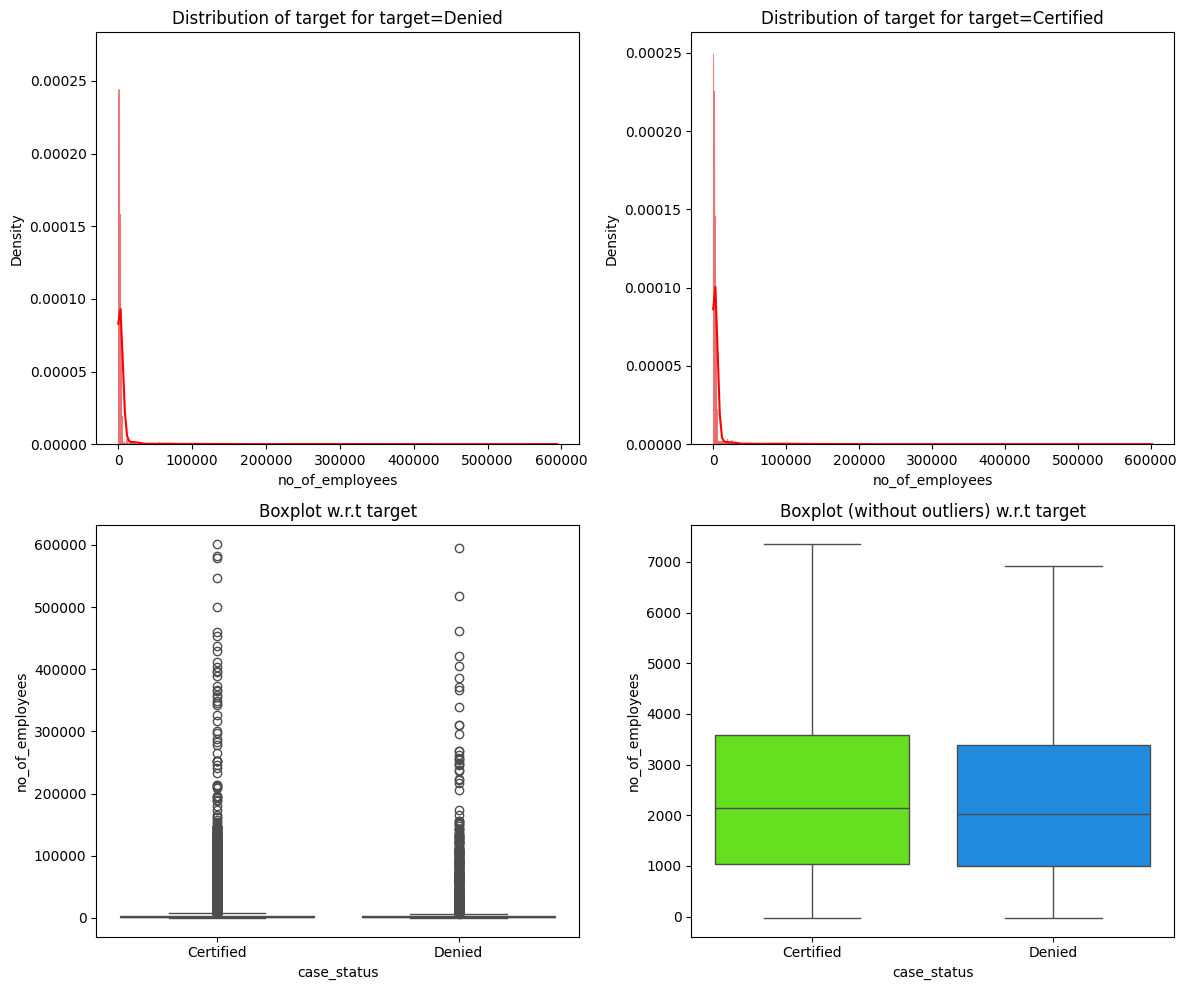

In [ ]:
distribution_plot_wrt_target(data, predictor= numerical_features[0], target='case_status')

- The distribution of employees across certified and denied cases is simila

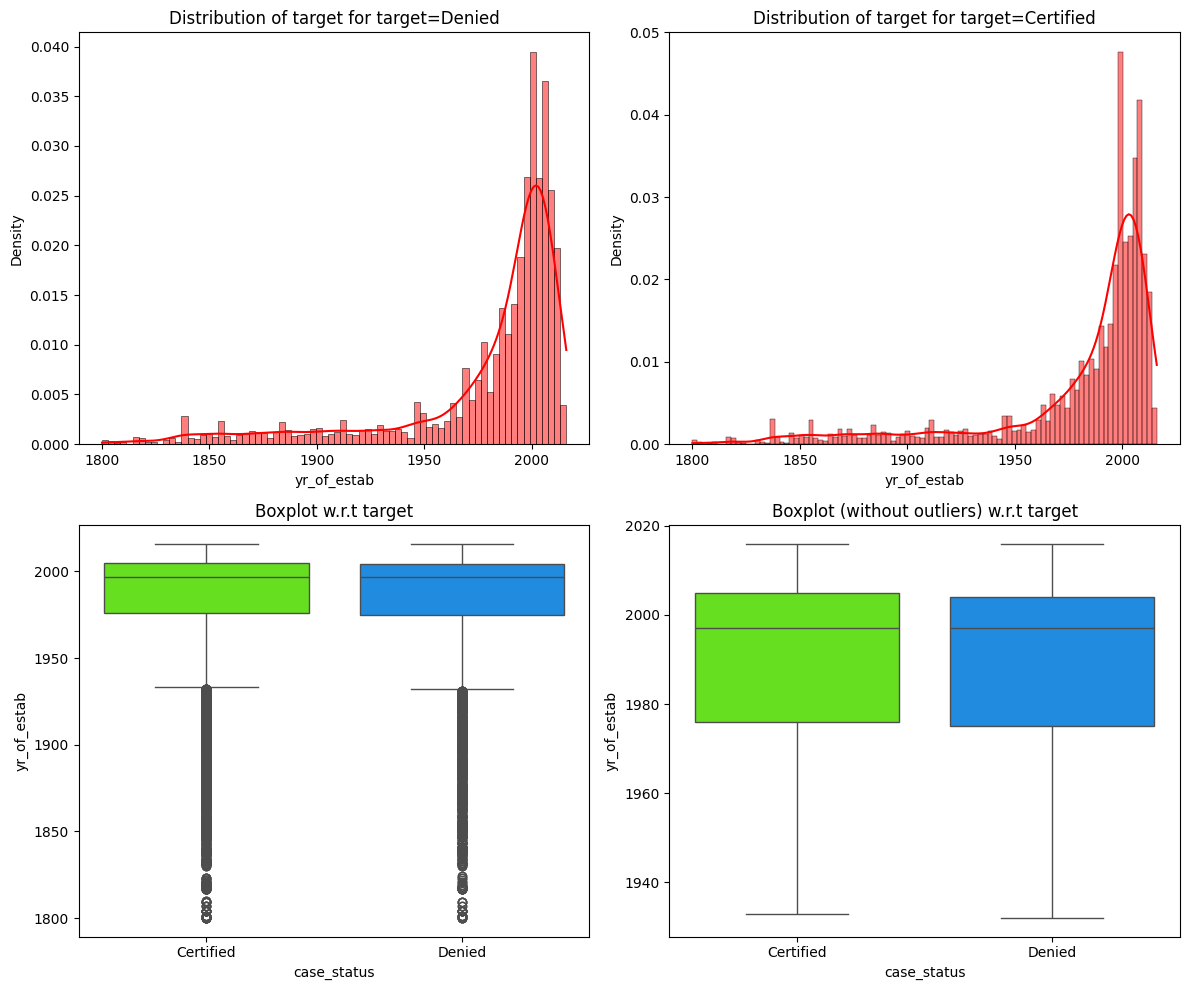

In [ ]:
distribution_plot_wrt_target(data, predictor= numerical_features[1], target='case_status')

- companies established more recently (after 2000) have a slightly higher chance of certification. Older companies (established before 1950) appear more often in denied cases

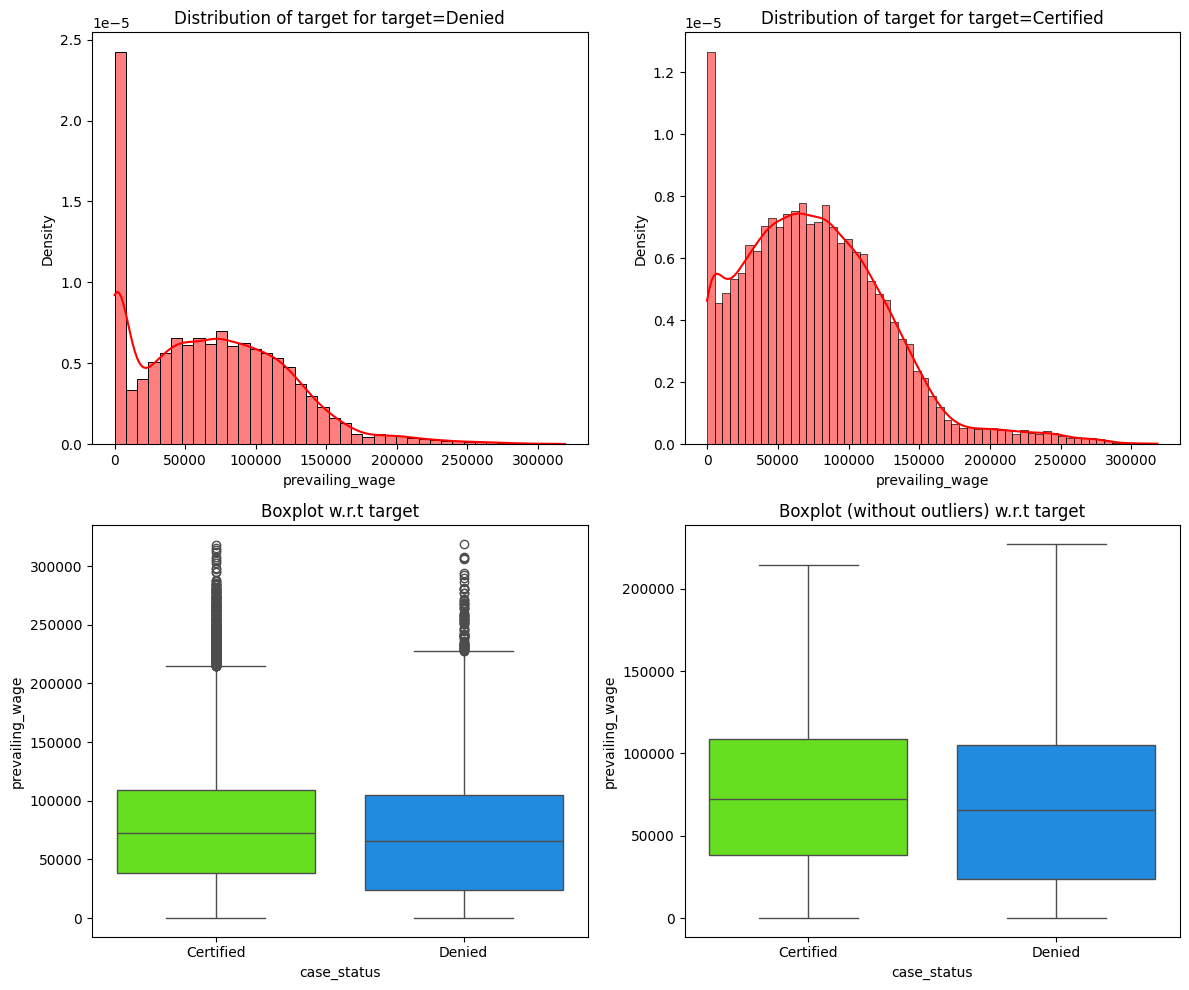

In [ ]:
distribution_plot_wrt_target(data, predictor= numerical_features[2], target='case_status')

- Applicants with higher prevailing wages are more likely to receive visa certification

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


###Outliers

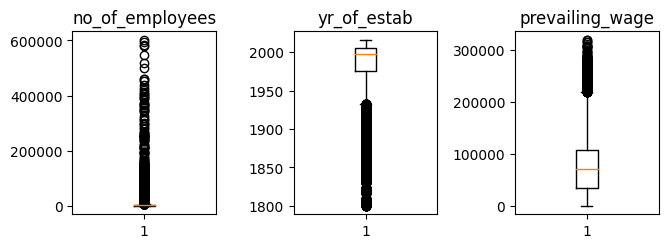

In [ ]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(9, 9))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- it seems that all of them continuse so we will leav them

##Data preparation

In [ ]:
replaceStruct = {
    "case_status": {"Certified": 1, "Denied": 0},
    "has_job_experience": {"N": 0, "Y": 1},
    "requires_job_training": {"N": 0, "Y": 1},
    "full_time_position": {"N": 0, "Y": 1},
}
data.replace(replaceStruct, inplace=True)

In [ ]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,0,0,14513,2007,West,592.2029,Hour,1,0
1,Asia,Master's,1,0,2412,2002,Northeast,83425.6500,Year,1,1
2,Asia,Bachelor's,0,1,44444,2008,West,122996.8600,Year,1,0
3,Asia,Bachelor's,0,0,98,1897,West,83434.0300,Year,1,0
4,Africa,Master's,1,0,1082,2005,South,149907.3900,Year,1,1


In [ ]:
X = data.drop(['case_status'],axis=1)
y = data['case_status']

X = pd.get_dummies(X,drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(17836, 21) (7644, 21)
(17836,) (7644,)


In [ ]:
y.value_counts(1)

,proportion
case_status,
1,0.667896
0,0.332104


In [ ]:
y_test.value_counts(1)

,proportion
case_status,
1,0.667844
0,0.332156


In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building bagging and boosting models

- **before that**
- Recall may be the most important metric because denying a qualified candidate (false negative) could have significant negative consequences for both the applicant and the hiring company. High recall ensures we capture as many qualified candidates as possible.
- precision is also important to ensure that we're not falsely approving unqualified candidates (false positives).

- The F1 score can be a good compromise between precision and recall if both are equally important, but recall is likely the primary focus based on the project's objective of correctly identifying as many qualified candidates as possible.

### Decision Tree

In [ ]:
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

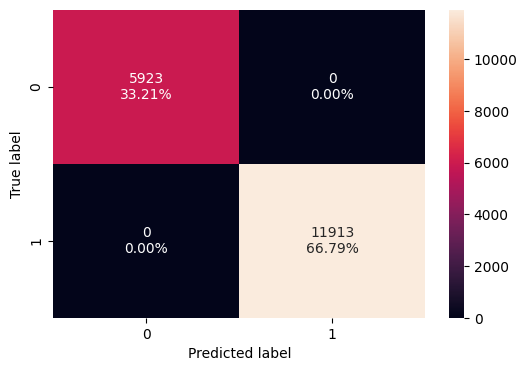

In [ ]:
confusion_matrix_sklearn(d_tree, X_train, y_train)

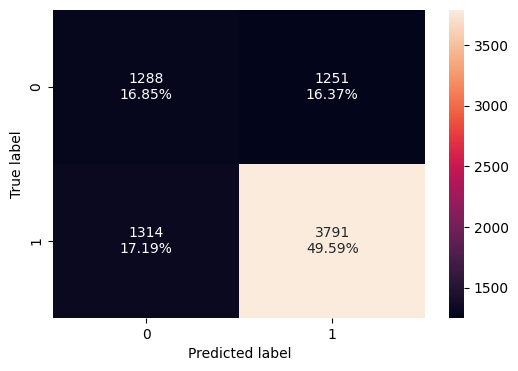

In [ ]:
confusion_matrix_sklearn(d_tree, X_test, y_test)

In [ ]:
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree, X_test, y_test)
d_tree_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.664443,0.742605,0.751884,0.747216


- on the training its a 1, so the drop its because the overfiting

### Bagging

#### without class weight

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

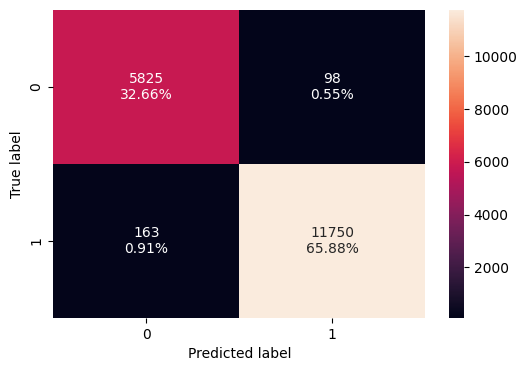

In [ ]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [ ]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
bagging_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985367,0.986317,0.991729,0.989016


- The model is performing very well on the **training set**, with high precision and recall. However, there are a few false positives and false negatives.

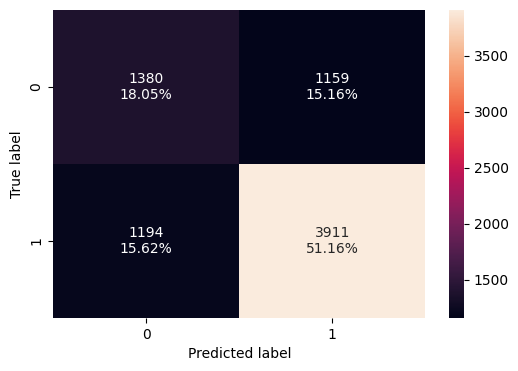

In [ ]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
bagging_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.692177,0.766112,0.7714,0.768747


- The model's performance on the test set shows overfitting compared to the training set (where performance was very high).

#### with class weight

In [ ]:
bagging_wt = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                 1: 0.83},
                                                   random_state=1),
                  random_state=1)

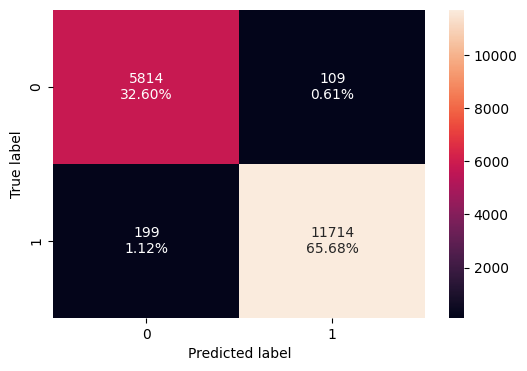

In [ ]:
confusion_matrix_sklearn(bagging_wt, X_train, y_train)

In [ ]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt, X_train, y_train)
bagging_wt_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.982732,0.983296,0.990781,0.987024


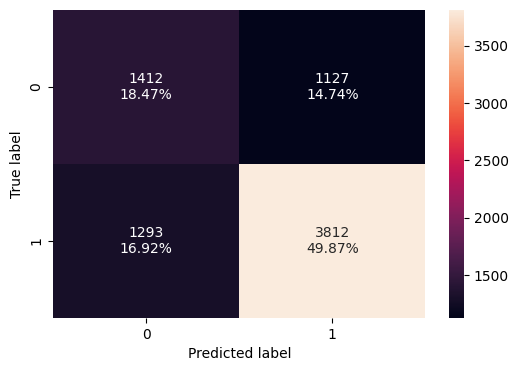

In [ ]:
confusion_matrix_sklearn(bagging_wt, X_test, y_test)

In [ ]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
bagging_wt_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.683412,0.746719,0.771816,0.75906


- the model is still susceptible to false positives, meaning some denied applicants are being incorrectly classified as certified.

### Random Forest


#### without class weight

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

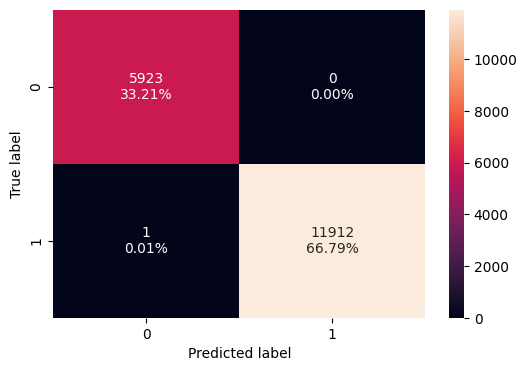

In [ ]:
confusion_matrix_sklearn(rf, X_train, y_train)

In [ ]:
rf_model_train_perf=model_performance_classification_sklearn(rf, X_train, y_train)
rf_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


- it almost 1 on the **train set**

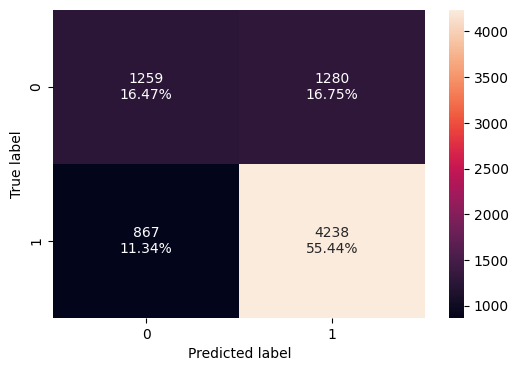

In [ ]:
confusion_matrix_sklearn(rf, X_test, y_test)

In [ ]:
rf_model_test_perf=model_performance_classification_sklearn(rf, X_test, y_test)
rf_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.719126,0.830167,0.768032,0.797891


- The model still has a higher recall than precision, meaning it captures most true certified cases but sometimes falsely certifies denied applicants.

#### with class weight

In [ ]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

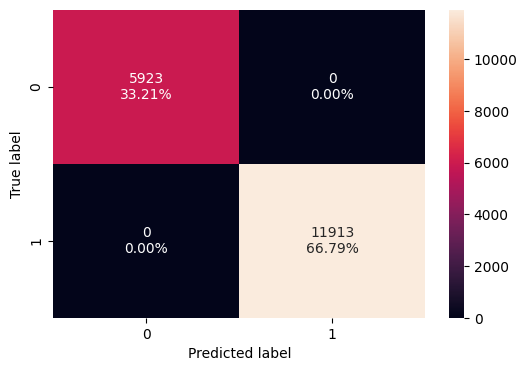

In [ ]:
confusion_matrix_sklearn(rf_wt, X_train, y_train)

In [ ]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train, y_train)
rf_wt_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


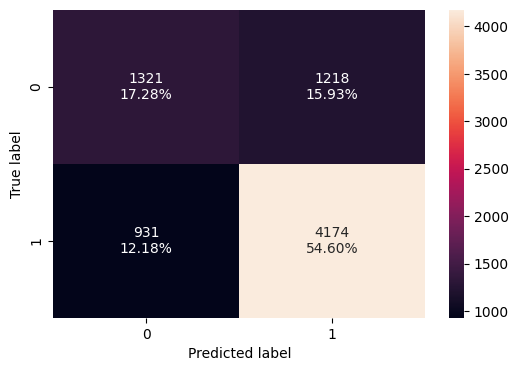

In [ ]:
confusion_matrix_sklearn(rf_wt, X_test, y_test)

In [ ]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test, y_test)
rf_wt_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.718864,0.81763,0.77411,0.795275


-The weighted random forest shows perfect performance on the train set (overfitting), but on the test set, accuracy is 71.88%, with a recall of 81.76%. The model is better at identifying certified cases, but precision is slightly lower, indicating some false positives. Overfitting remains a concern.

### Boosting

#### AdaBoost

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

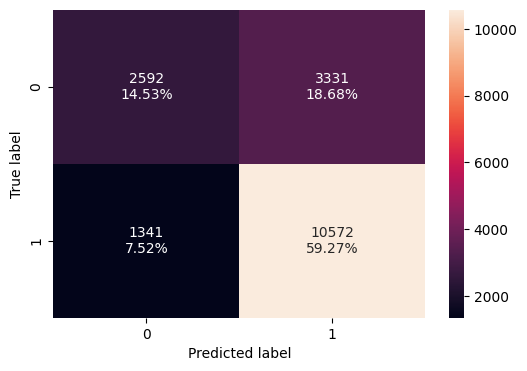

In [ ]:
confusion_matrix_sklearn(abc, X_train, y_train)

In [ ]:
abc_model_train_perf=model_performance_classification_sklearn(abc, X_train, y_train)
abc_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738058,0.887434,0.760411,0.819027


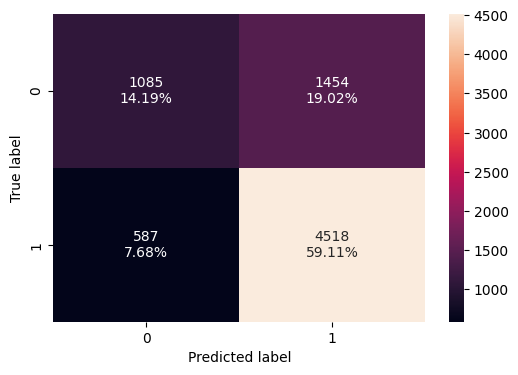

In [ ]:
confusion_matrix_sklearn(abc, X_test, y_test)

In [ ]:
abc_model_test_perf=model_performance_classification_sklearn(abc, X_test, y_test)
abc_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.732993,0.885015,0.75653,0.815744


- The AdaBoostClassifier performs moderately well, with a good balance between recall and precision, but it struggles with misclassifying some denied cases as certified, both on the training and test sets.

#### Gradient Boosting

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

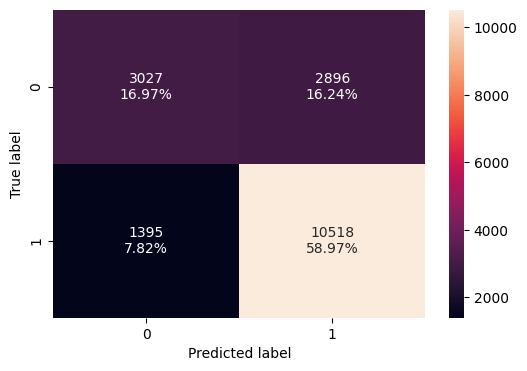

In [ ]:
confusion_matrix_sklearn(gbc, X_train, y_train)

In [ ]:
gbc_model_train_perf=model_performance_classification_sklearn(gbc, X_train, y_train)
gbc_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.759419,0.882901,0.784106,0.830576


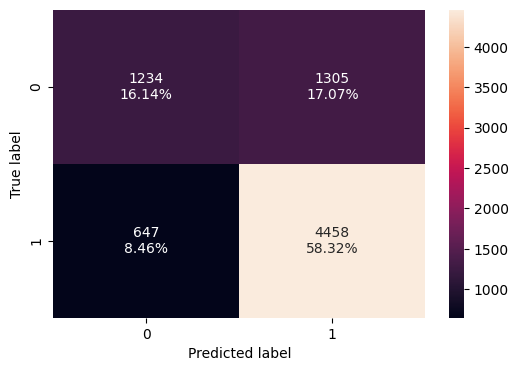

In [ ]:
confusion_matrix_sklearn(gbc, X_test, y_test)

In [ ]:
gbc_model_test_perf=model_performance_classification_sklearn(gbc, X_test, y_test)
gbc_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744636,0.873262,0.773555,0.82039


- the model demonstrates balanced performance but could benefit from tuning to improve precision and further reduce misclassifications.

#### XGBoost

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

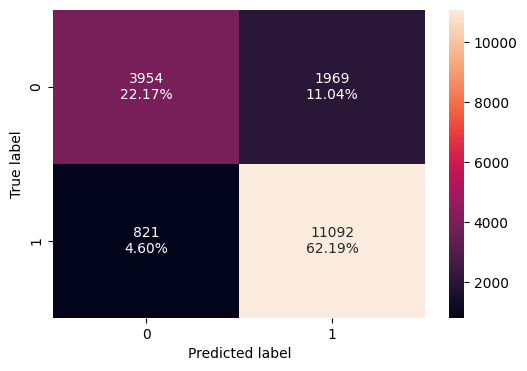

In [ ]:
confusion_matrix_sklearn(xgb, X_train, y_train)

In [ ]:
xgb_model_train_perf=model_performance_classification_sklearn(xgb, X_train, y_train)
xgb_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.843575,0.931084,0.849246,0.888284


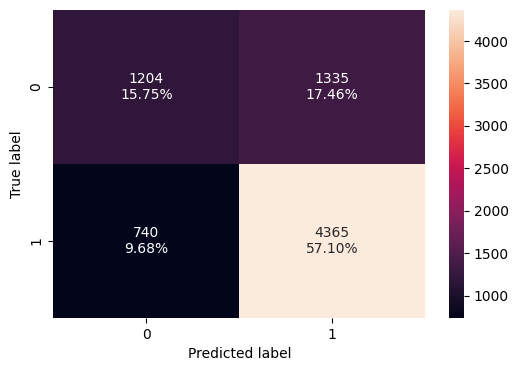

In [ ]:
confusion_matrix_sklearn(xgb, X_test, y_test)

In [ ]:
xgb_model_test_perf=model_performance_classification_sklearn(xgb, X_test, y_test)
xgb_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.728545,0.855044,0.765789,0.807959


- The model generalizes relatively well, as the performance on the test set is close to the training set, but with a noticeable drop in precision on the test set, mean there is an overfitting.

##  Will tuning the hyperparameters improve the model performance?

### Decision Tree Tuning


In [ ]:
dtree_tune = DecisionTreeClassifier(class_weight="balanced",random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tune, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tune = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tune.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, random_state=1)

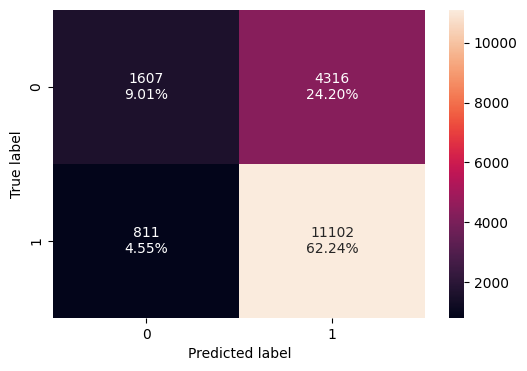

In [ ]:
confusion_matrix_sklearn(dtree_tune, X_train, y_train)

In [ ]:
dtree_tune_model_train_perf=model_performance_classification_sklearn(dtree_tune, X_train, y_train)
dtree_tune_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


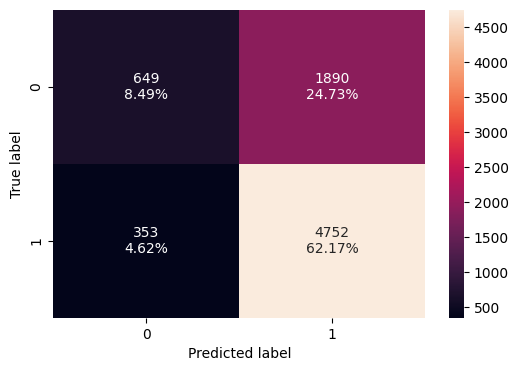

In [ ]:
confusion_matrix_sklearn(dtree_tune, X_test, y_test)

In [ ]:
dtree_tune_model_test_perf=model_performance_classification_sklearn(dtree_tune, X_test, y_test)
dtree_tune_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


-  the model is more inclined toward correctly identifying actual certified cases but struggles with precision in predicting denied cases.

### Bagging Tuning

In [ ]:

param_grid = {
    'max_samples': [0.7,0.8,0.9,1],
    'max_features': [0.7,0.8,0.9,1],
    'n_estimators': [30, 50, 70],
}

grid = GridSearchCV(
    BaggingClassifier(random_state=1,bootstrap=True), param_grid, cv=5, scoring='recall'
)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score (recall):", grid.best_score_)
bagging_tuned = grid.best_estimator_
bagging_tuned.fit(X_train, y_train)

Best parameters: {'max_features': 0.7, 'max_samples': 1, 'n_estimators': 30}
Best cross-validation score (recall): 1.0


BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=30,
                  random_state=1)

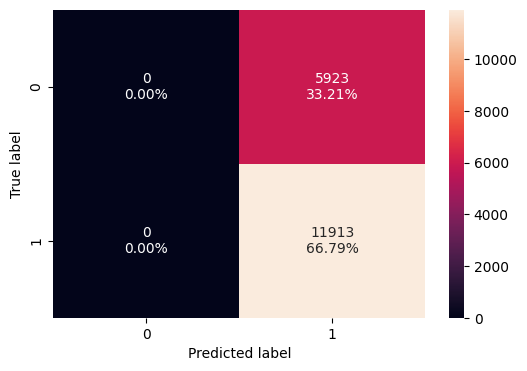

In [ ]:
confusion_matrix_sklearn(bagging_tuned, X_train, y_train)

In [ ]:
bagging_tuned_model_train_perf=model_performance_classification_sklearn(bagging_tuned, X_train, y_train)
bagging_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.667919,1.0,0.667919,0.800901


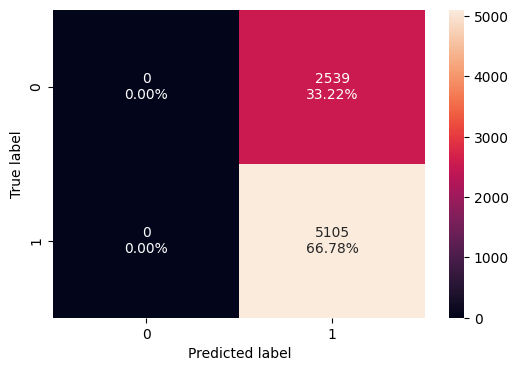

In [ ]:
confusion_matrix_sklearn(bagging_tuned, X_test, y_test)

In [ ]:
bagging_tuned_model_test_perf=model_performance_classification_sklearn(bagging_tuned, X_test, y_test)
bagging_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.667844,1.0,0.667844,0.800847


- The tuned bagging model is overfitting both on the training and test sets, predicting all cases as certified (class 1). There are no predictions for denied cases (class 0), resulting in 100% recall but poor generalization. The model fails to differentiate between the two classes effectively.


- try another grid

In [ ]:

param_grid2 = {
    'max_samples': [0.7,0.8,0.9,1],
    'max_features': [0.7,0.8,0.9,1],
    'n_estimators': [30, 50, 70],
}

grid2 = GridSearchCV(
    BaggingClassifier(random_state=1,bootstrap=True), param_grid2, cv=5, scoring='f1'
)
grid2.fit(X_train, y_train)

print("Best parameters:", grid2.best_params_)
print("Best cross-validation score (recall):", grid2.best_score_)
bagging_tuned2 = grid2.best_estimator_
bagging_tuned2.fit(X_train, y_train)

Best parameters: {'max_features': 0.8, 'max_samples': 0.7, 'n_estimators': 50}
Best cross-validation score (recall): 0.8144256915699953


BaggingClassifier(max_features=0.8, max_samples=0.7, n_estimators=50,
                  random_state=1)

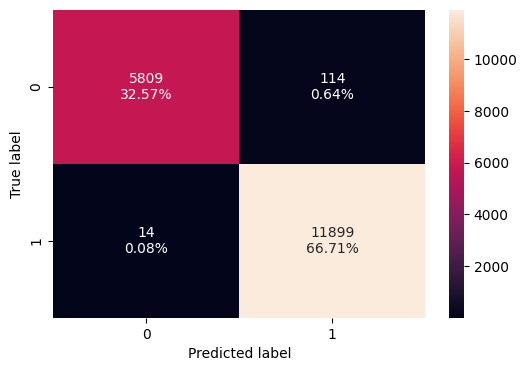

In [ ]:
confusion_matrix_sklearn(bagging_tuned2, X_train, y_train)

In [ ]:
bagging_grid2_model_train_perf=model_performance_classification_sklearn(bagging_tuned2, X_train, y_train)
bagging_grid2_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.992824,0.998825,0.99051,0.99465


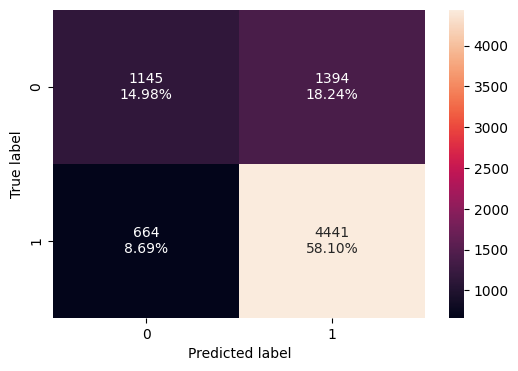

In [ ]:
confusion_matrix_sklearn(bagging_tuned2, X_test, y_test)

In [ ]:
bagging_grid2_model_test_perf=model_performance_classification_sklearn(bagging_tuned2, X_test, y_test)
bagging_grid2_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.730769,0.869931,0.761097,0.811883


- The model has improved in generalization after tuning for the F1 score, with a better balance between precision and recall.

### Tuning Random Forest

In [ ]:
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
         "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=110,
                       random_state=1)

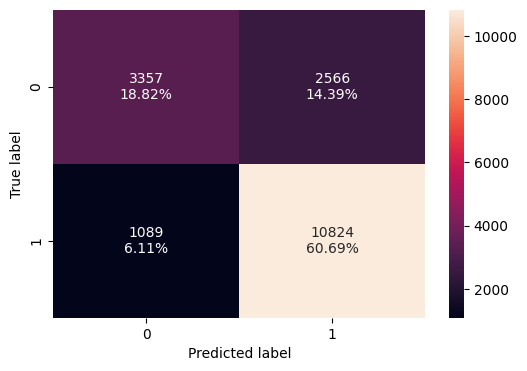

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [ ]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train, y_train)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.795077,0.908587,0.808364,0.855551


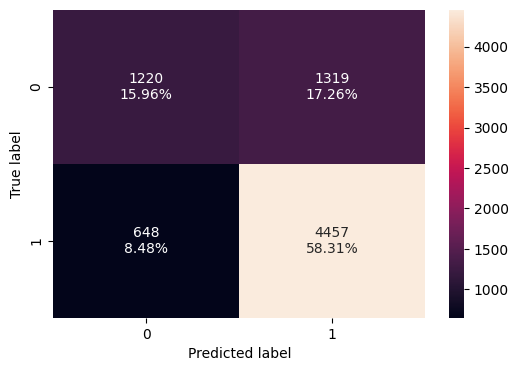

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [ ]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742674,0.873066,0.771641,0.819226


- The random forest model performs well on training data but overfits slightly. It generalizes decently on the test set, capturing most certified cases but still misclassifies some denied cases as certified.

###  Boosting Tuning

#### AdaBoost

In [ ]:

param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

grid = GridSearchCV(
    AdaBoostClassifier(random_state=1), param_grid, cv=5, scoring='recall'
)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score (recall):", grid.best_score_)

abc_tuned = grid.best_estimator_
abc_tuned.fit(X_train, y_train)


Best parameters: {'estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'learning_rate': 0.01, 'n_estimators': 75}
Best cross-validation score (recall): 0.9182409123116336


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.01, n_estimators=75, random_state=1)

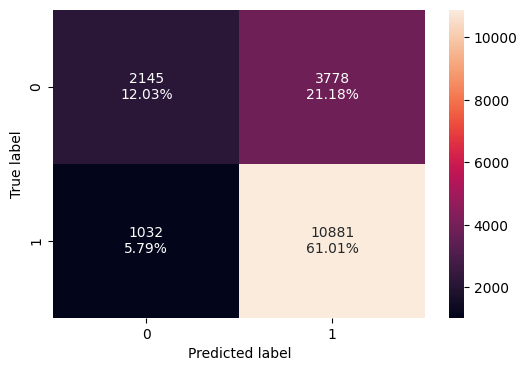

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [ ]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned, X_train, y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.730321,0.913372,0.742274,0.818982


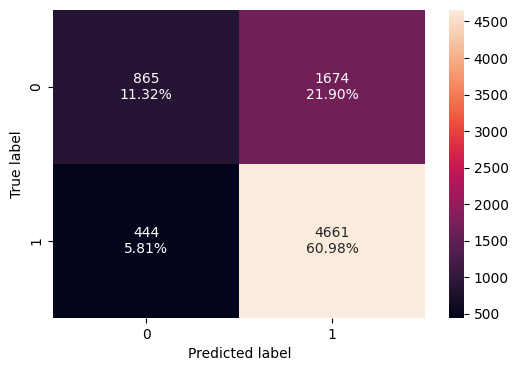

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [ ]:
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned, X_test, y_test)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.72292,0.913026,0.735754,0.81486


- The tuned AdaBoost model shows strong recall on both the training and test sets, effectively capturing most of the true certified cases. However, the precision is lower, indicating a higher rate of false positives, where denied cases are predicted as certified.

#### Gradient Boosting

In [ ]:
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

grid = GridSearchCV(
    GradientBoostingClassifier(random_state=1), param_grid, cv=5, scoring='recall'
)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score (recall):", grid.best_score_)

gbc_tuned = grid.best_estimator_
gbc_tuned.fit(X_train, y_train)

Best parameters: {'init': AdaBoostClassifier(random_state=1), 'learning_rate': 0.01, 'max_features': 1, 'n_estimators': 50, 'subsample': 0.9}
Best cross-validation score (recall): 0.9949636964603389


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=1, n_estimators=50,
                           random_state=1, subsample=0.9)

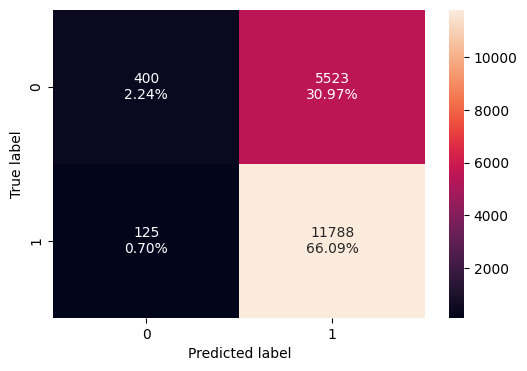

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [ ]:
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.683337,0.989507,0.680954,0.806734


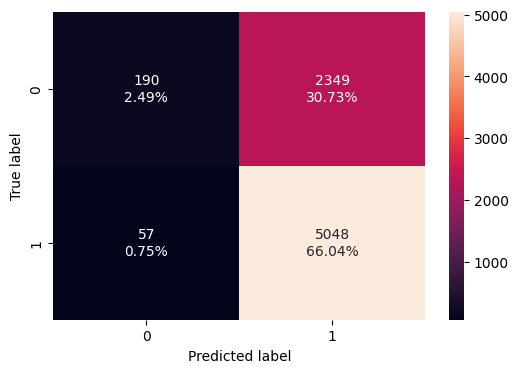

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [ ]:
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.685243,0.988834,0.682439,0.807551


- The tuned Gradient Boosting model performs well in terms of recall on both the training and test sets, capturing almost all of the certified cases. However, the precision is lower, leading to many denied cases being misclassified as certified.
- **it can be improved more by making the scoring f1**

#### XGBoost

In [ ]:
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

grid_obj = GridSearchCV(xgb_tuned, parameters,scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_features=array([0.3, 0.4, 0.5]), max_leaves=None,
              max_samples=0.4, min_child_weight=None, min_samples_leaf=1,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=25, ...)

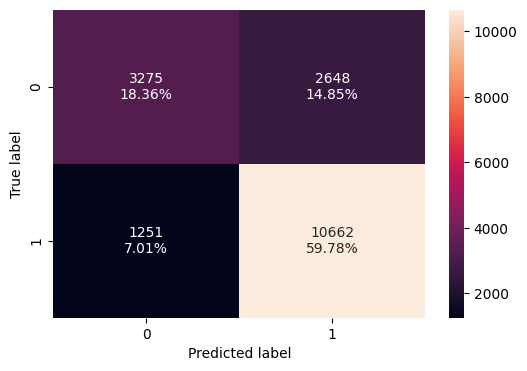

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [ ]:
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.781397,0.894989,0.801052,0.845419


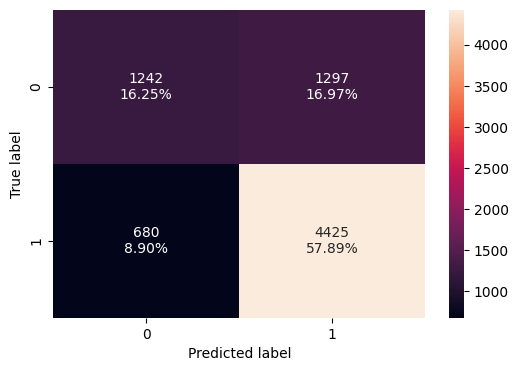

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [ ]:
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.741366,0.866797,0.773331,0.817401


- The tuned XGBoost shows an improvement in recall, effectively capturing most of the certified cases, both in the training and test sets. However, the precision remains somewhat low, leading to a higher number of false positives (denied cases predicted as certified). The F1 score is balanced, reflecting the trade-off between recall and precision. The model appears to generalize reasonably well, as the test set performance is consistent with the training set, although there is a slight overfitting as the recall is slightly higher in training.

### Stacking Model

In [ ]:
estimators = [
    ('rf_tuned', rf_estimator),
    ('gbc_tuned', gbc_tuned),
    ('dtree_tuned', dtree_tune),
    ('abc_tuned', abc_tuned)
]

# Define the final estimator, in this case, XGBoost (tuned)
final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('rf_tuned',
                                RandomForestClassifier(max_samples=0.4,
                                                       min_samples_leaf=3,
                                                       n_estimators=110,
                                                       random_state=1)),
                               ('gbc_tuned',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.01,
                                                           max_features=1,
                                                           n_estimators=50,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('dtree_tuned',
                                DecisionTreeClassifier(class_weight='ba...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_features=array([0.3, 0.4, 0.5]),
                                                 max_leaves=None,
                                                 max_samples=0.4,
                                                 min_child_weight=None,
                                                 min_samples_leaf=1,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=25, ...))

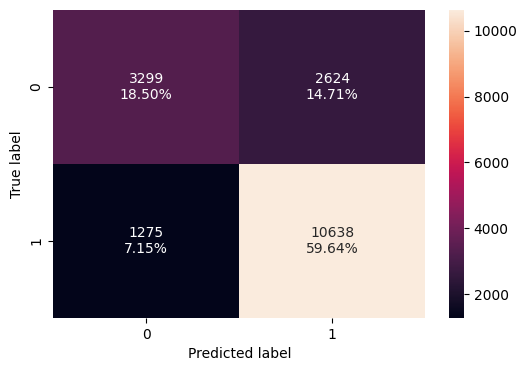

In [ ]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [ ]:
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.781397,0.892974,0.802141,0.845124


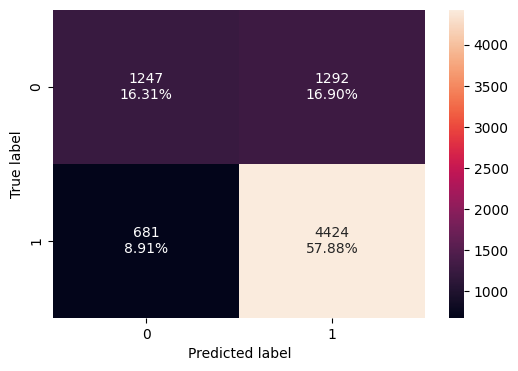

In [ ]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [ ]:
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier, X_test, y_test)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.741889,0.866601,0.773968,0.817669


- The stacking classifier shows good recall and consistent performance between training and test sets, but precision is lower, indicating that the model still misclassifies some negative cases as positive. The F1-score reflects a balanced model.

## Model Performance Comparison and Conclusions

In [ ]:
models_train_comp = pd.concat([d_tree_model_train_perf.T,
                               dtree_tune_model_train_perf.T,
                               bagging_model_train_perf.T,
                               bagging_tuned_model_train_perf.T,
                               bagging_grid2_model_train_perf.T,
                               rf_model_train_perf.T,
                               rf_estimator_model_train_perf.T,
                               abc_model_train_perf.T,
                               abc_tuned_model_train_perf.T,
                               gbc_model_train_perf.T,
                               gbc_tuned_model_train_perf.T,
                               xgb_model_train_perf.T,
                               xgb_tuned_model_train_perf.T,
                               stacking_classifier_model_train_perf.T], axis=1)

models_train_comp.columns=[ "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging Tuned 1",
    "Bagging Tuned 2",
    "Random Forest",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]

# Display the DataFrame with metrics as rows and models as columns
models_train_comp


,Decision Tree,Decision Tree Tuned,Bagging Classifier,Bagging Tuned 1,Bagging Tuned 2,Random Forest,Random Forest Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985367,0.667919,0.992824,0.999944,0.795077,0.738058,0.730321,0.759419,0.683337,0.843575,0.781397,0.781397
Recall,1.0,0.931923,0.986317,1.000000,0.998825,0.999916,0.908587,0.887434,0.913372,0.882901,0.989507,0.931084,0.894989,0.892974
Precision,1.0,0.720067,0.991729,0.667919,0.990510,1.000000,0.808364,0.760411,0.742274,0.784106,0.680954,0.849246,0.801052,0.802141
F1,1.0,0.812411,0.989016,0.800901,0.994650,0.999958,0.855551,0.819027,0.818982,0.830576,0.806734,0.888284,0.845419,0.845124


In [ ]:
models_test_comp = pd.concat([
    d_tree_model_test_perf.T,
    dtree_tune_model_test_perf.T,
    bagging_model_test_perf.T,
    bagging_tuned_model_test_perf.T,
    bagging_grid2_model_test_perf.T,
    rf_model_test_perf.T,
    rf_estimator_model_test_perf.T,
    abc_model_test_perf.T,
    abc_tuned_model_test_perf.T,
    gbc_model_test_perf.T,
    gbc_tuned_model_test_perf.T,
    xgb_model_test_perf.T,
    xgb_tuned_model_test_perf.T,
    stacking_classifier_model_test_perf.T
], axis=1)



models_test_comp.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging Tuned 1",
    "Bagging Tuned 2",
    "Random Forest",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"
]

models_test_comp

,Decision Tree,Decision Tree Tuned,Bagging Classifier,Bagging Tuned 1,Bagging Tuned 2,Random Forest,Random Forest Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664443,0.706567,0.692177,0.667844,0.730769,0.719126,0.742674,0.732993,0.722920,0.744636,0.685243,0.728545,0.741366,0.741889
Recall,0.742605,0.930852,0.766112,1.000000,0.869931,0.830167,0.873066,0.885015,0.913026,0.873262,0.988834,0.855044,0.866797,0.866601
Precision,0.751884,0.715447,0.771400,0.667844,0.761097,0.768032,0.771641,0.756530,0.735754,0.773555,0.682439,0.765789,0.773331,0.773968
F1,0.747216,0.809058,0.768747,0.800847,0.811883,0.797891,0.819226,0.815744,0.814860,0.820390,0.807551,0.807959,0.817401,0.817669


-XGBoost Tuned and Stacking Classifier offer the best balance between recall and precision, making them strong candidates, while Bagging Tuned 1 is ideal if recall is prioritized above all.

## Actionable Insights and Recommendations

- **Key Factors that Drive Visa Certification:**
 - **Education Level:** Applicants with higher education levels, such as Bachelor's and Master's degrees, have a greater likelihood of visa certification.

    - **Action:** Prioritize highly educated applicants to improve approval rates.
 - **Job Experience:** Candidates with job experience are more likely to get their visa certified.

    - **Action:** Focus on experienced candidates and guide less experienced ones to meet visa requirements.
 - **Region of Employment:** Regions with higher demand for skilled workers see more visa certifications.

    - **Action:** Analyze regional trends and prioritize applicants based on job market demand in specific areas.
 - **Wage Information:** Applicants with wages that meet or exceed the prevailing wage in their occupation are more likely to be certified.

    - **Action:** Ensure that wages meet industry standards to increase the chances of approval.

- Recommendations:
 - **Focus on High-Education and High-Wage Profiles:** Applicants with higher education and wages meeting prevailing industry standards are more likely to succeed in the visa process. The company should prioritize and support these candidates.

 - **Optimize Regional Hiring Strategies:** Analyze visa certification trends based on the intended region of employment, as this can impact approval rates.
